<a href="https://colab.research.google.com/github/ram05007/ML-Prediction-Models/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


from google.colab import files
uploaded = files.upload()


for filename in uploaded.keys():
    print(f"Loading dataset from: {filename}")
    df = pd.read_csv(filename)


print("\nDataset Info:")
print(df.info())


print("\nFirst few rows:")
print(df.head())


print("\nMissing Values:")
print(df.isnull().sum())


print("\nDataset Statistics:")
print(df.describe())

Saving kc_house_data.csv to kc_house_data (1).csv
Loading dataset from: kc_house_data (1).csv

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null

In [ ]:

for col in ['price', 'sqft_living','sqft_living15','sqft_lot', 'sqft_lot15','bedrooms','bathrooms','sqft_above']:
    upper_limit = df[col].quantile(0.999)
    df = df[(df[col] <= upper_limit)]


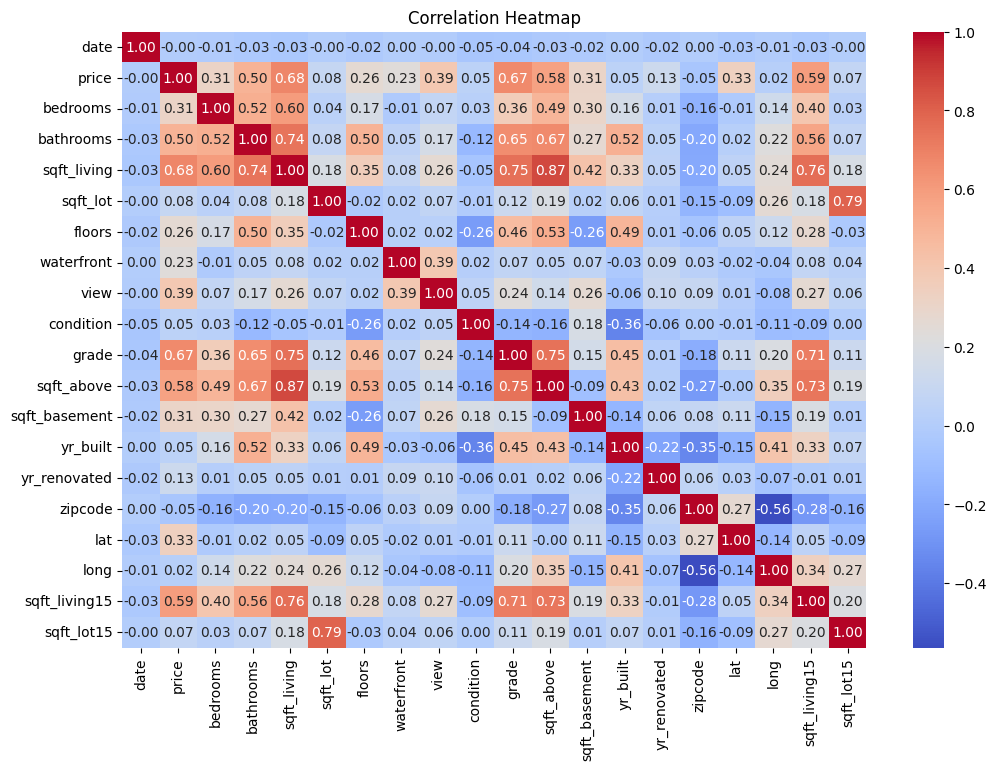

In [ ]:

df['date'] = pd.to_datetime(df['date'])
df.drop(columns=['id'], inplace = True)
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

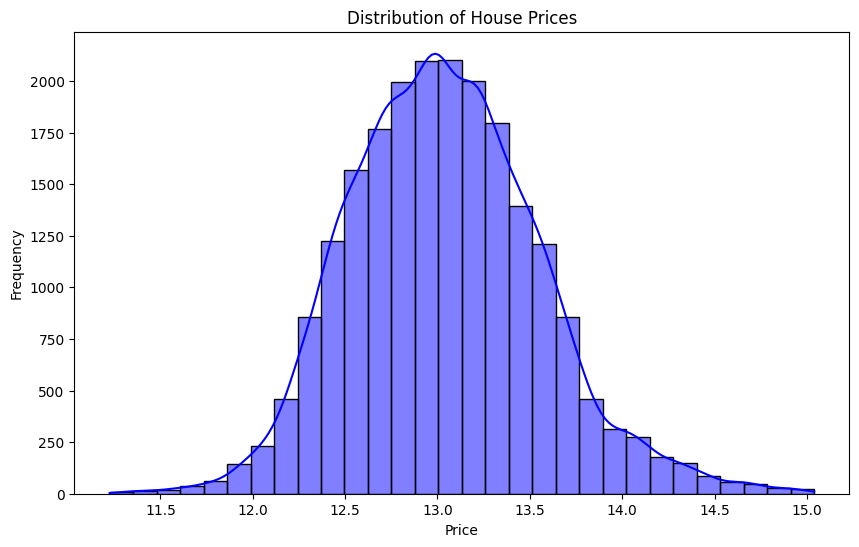

In [ ]:

df['price'] = np.log1p(df['price'])
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, color='blue', bins=30)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

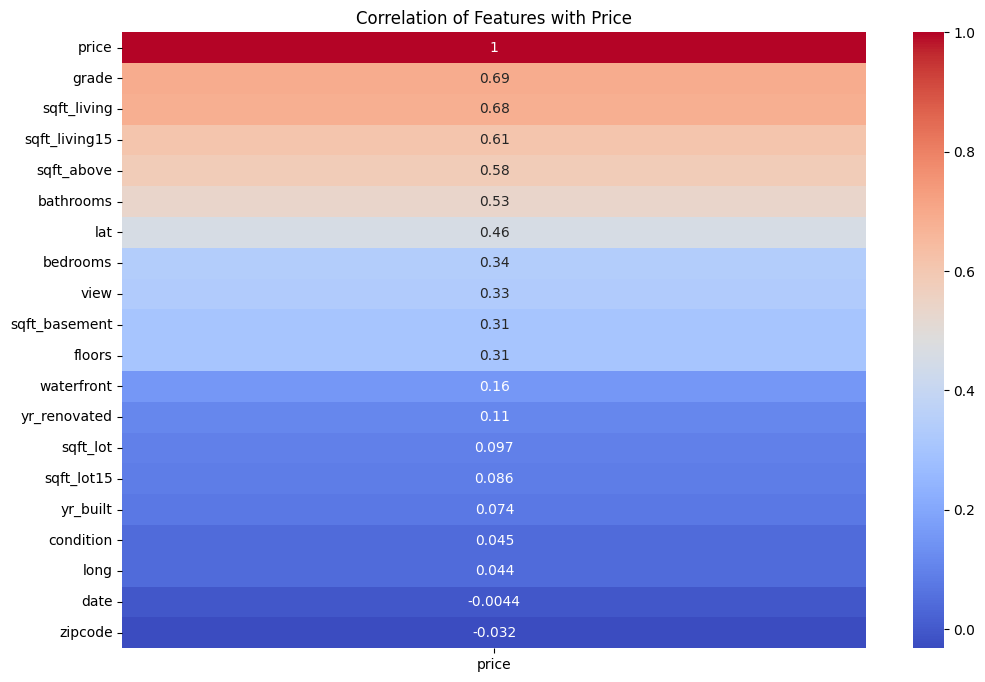

In [ ]:

plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr[['price']].sort_values(by='price', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Features with Price')
plt.show()


/tmp/ipython-input-25-1692179360.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='grade', y='price', data=df, palette='coolwarm')


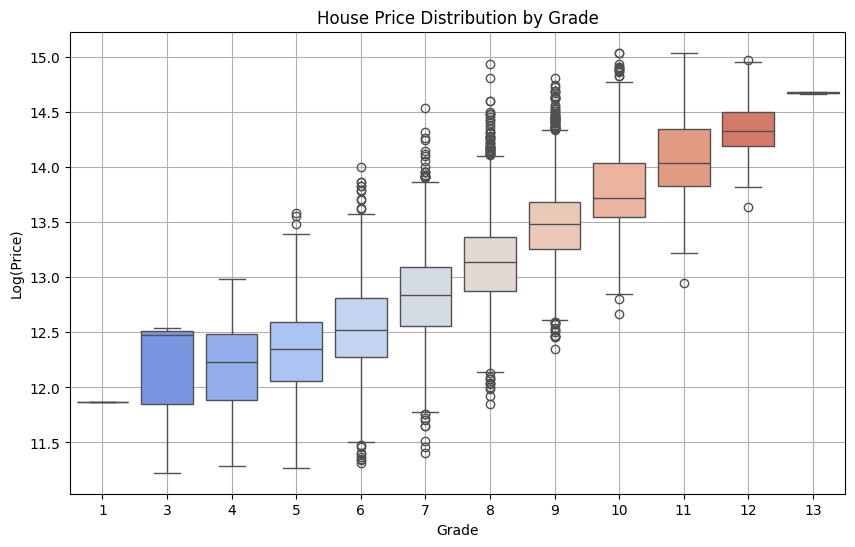

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='grade', y='price', data=df, palette='coolwarm')
plt.title('House Price Distribution by Grade')
plt.xlabel('Grade')
plt.ylabel('Log(Price)' if df['price'].max() < 20 else 'Price')
plt.grid(True)
plt.show()


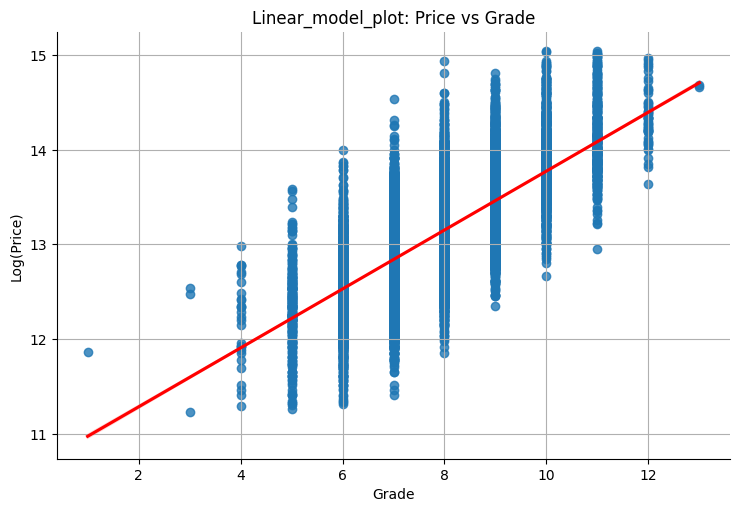

In [ ]:
sns.lmplot(x='grade', y='price', data=df, height=5, aspect=1.5, line_kws={'color': 'red'})
plt.title("Linear_model_plot: Price vs Grade")
plt.xlabel("Grade")
plt.ylabel("Log(Price)" if df['price'].max() < 20 else "Price")
plt.grid(True)
plt.show()


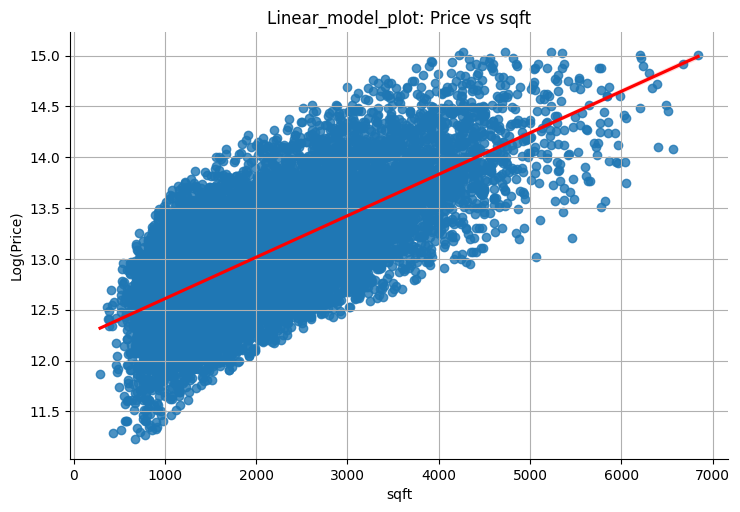

In [ ]:
sns.lmplot(x='sqft_living', y='price', data=df, height=5, aspect=1.5,line_kws = {'color':'red'})
plt.title("Linear_model_plot: Price vs sqft")
plt.xlabel("sqft")
plt.ylabel("Log(Price)" if df['price'].max() < 20 else "Price")
plt.grid(True)
plt.show()

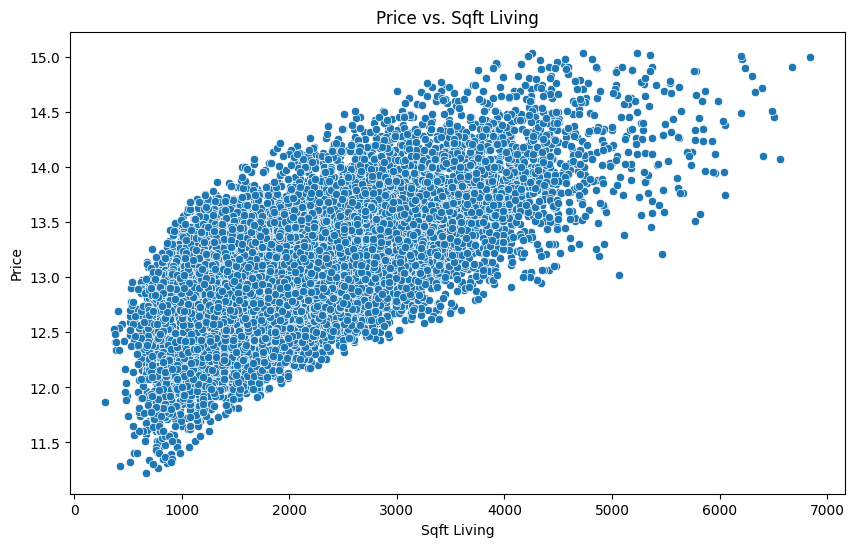

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['sqft_living'], y=df['price'])
plt.title("Price vs. Sqft Living")
plt.xlabel("Sqft Living")
plt.ylabel("Price")
plt.show()


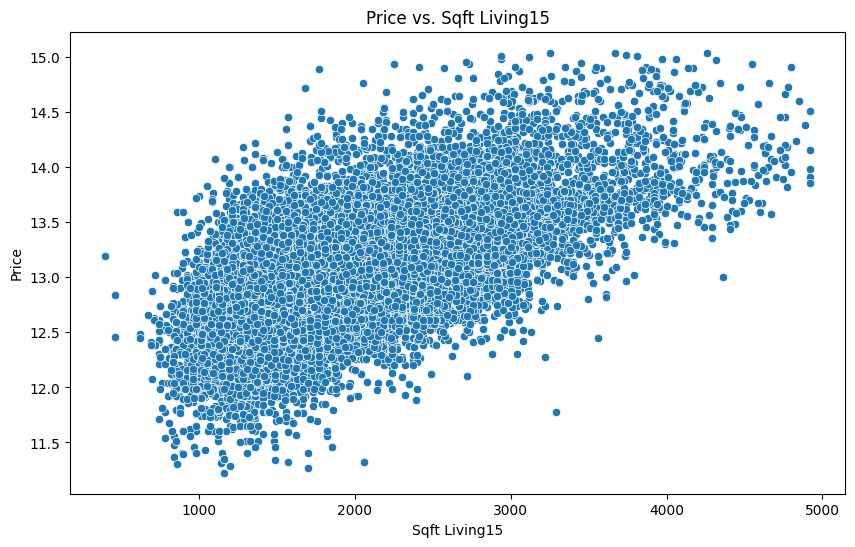

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['sqft_living15'], y=df['price'])
plt.title("Price vs. Sqft Living15")
plt.xlabel("Sqft Living15")
plt.ylabel("Price")
plt.show()


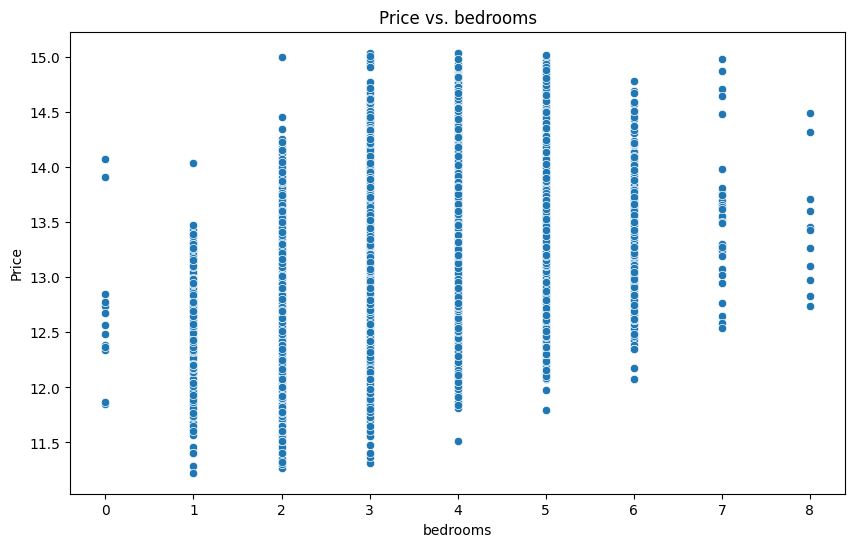

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['bedrooms'], y=df['price'])
plt.title("Price vs. bedrooms")
plt.xlabel("bedrooms")
plt.ylabel("Price")
plt.show()


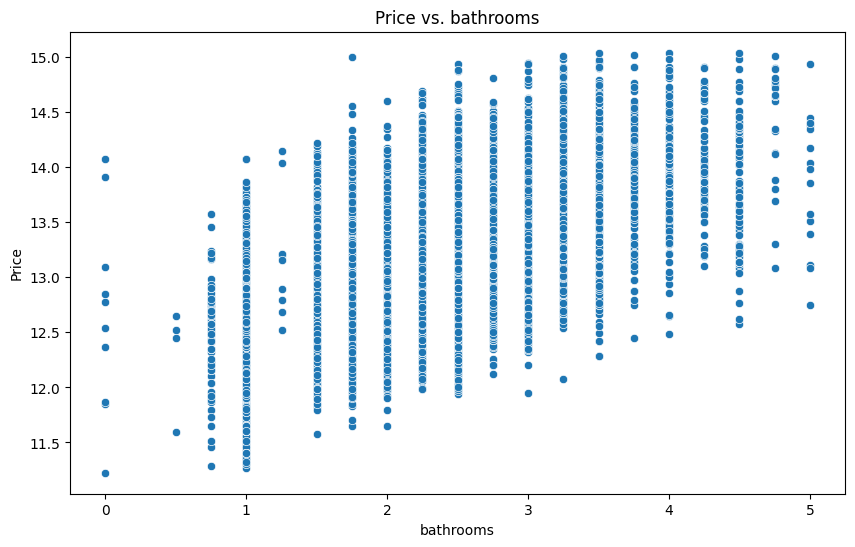

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['bathrooms'], y=df['price'])
plt.title("Price vs. bathrooms")
plt.xlabel("bathrooms")
plt.ylabel("Price")
plt.show()


In [ ]:

df['total_area'] = df['sqft_living'] + df['sqft_basement']

zip_price = df.groupby('zipcode')['price'].mean()
df['zip_avg_price'] = df['zipcode'].map(zip_price)

df = df.drop(['date'], axis=1)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('price', axis=1))

X = pd.DataFrame(X_scaled, columns=df.drop('price', axis=1).columns)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)



rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

print(f"R² (Polynomial): {r2_score(y_test, y_pred_poly):.2f}")



def evaluate_model(y_test, y_pred, model_name):
    print(f"\n{model_name} Evaluation:")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
    print(f"R^2 Score: {r2_score(y_test, y_pred):.2f}")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")

train_pred_poly = poly_model.predict(X_train)
print("Train R²:", r2_score(y_train, train_pred_poly))
print("Test R² :", r2_score(y_test, y_pred_poly))

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

evaluate_model(y_test, y_pred_gbr, "Gradient Boosting")



R² (Polynomial): 0.88

Linear Regression Evaluation:
Mean Absolute Error: 0.14
Mean Squared Error: 0.04
Root Mean Squared Error: 0.19
R^2 Score: 0.86

Random Forest Regressor Evaluation:
Mean Absolute Error: 0.12
Mean Squared Error: 0.03
Root Mean Squared Error: 0.17
R^2 Score: 0.89
Train R²: 0.8830814317760355
Test R² : 0.8800993662379238

Gradient Boosting Evaluation:
Mean Absolute Error: 0.12
Mean Squared Error: 0.03
Root Mean Squared Error: 0.17
R^2 Score: 0.89


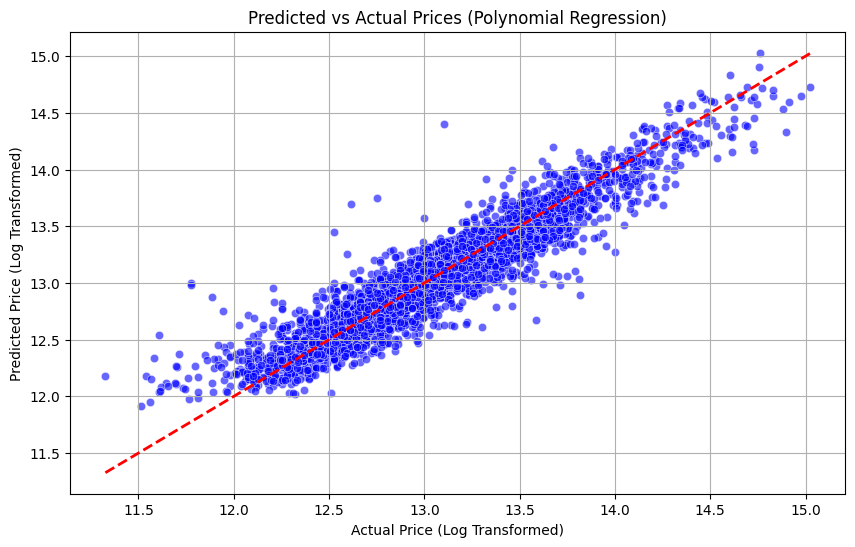

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_gbr, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Price (Log Transformed)")
plt.ylabel("Predicted Price (Log Transformed)")
plt.title("Predicted vs Actual Prices (Polynomial Regression)")
plt.grid(True)
plt.show()


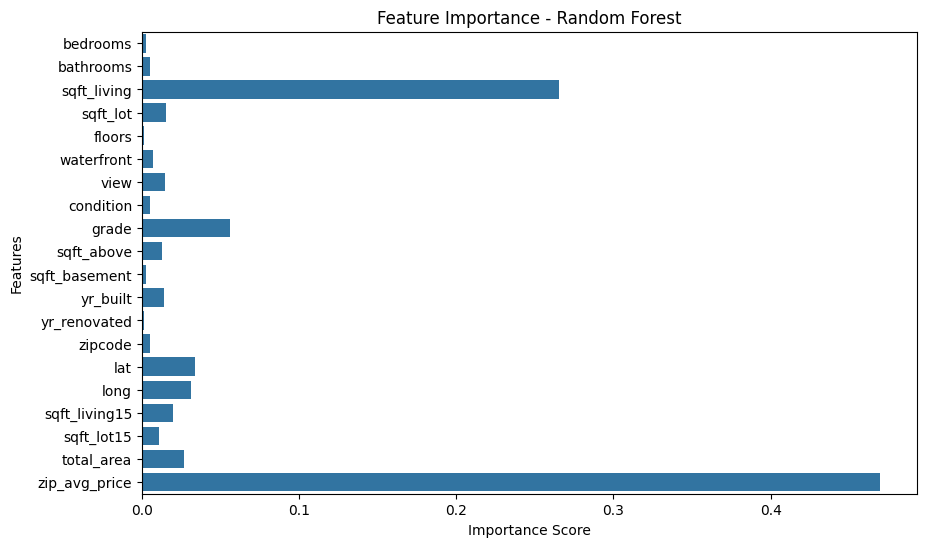

In [ ]:

importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


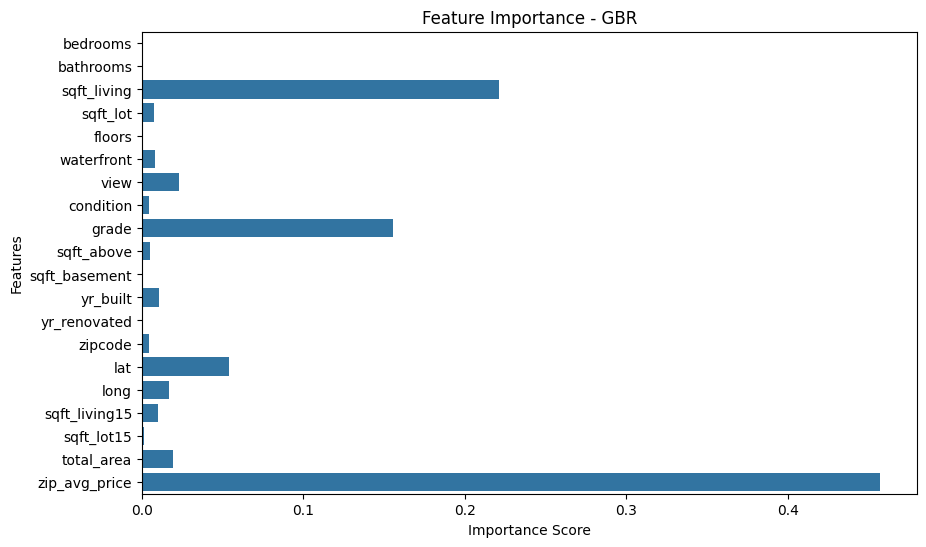

In [ ]:

importances = gbr.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance - GBR')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


In [ ]:

sample = {
    'bedrooms': 3,
    'bathrooms': 2,
    'sqft_living': 1800,
    'sqft_lot': 5000,
    'floors': 1.0,
    'waterfront': 0,
    'view': 0,
    'condition': 3,
    'grade': 7,
    'sqft_above': 1800,
    'sqft_basement': 0,
    'yr_built': 1990,
    'yr_renovated': 0,
    'zipcode': 98103,
    'lat': 47.65,
    'long': -122.34,
    'sqft_living15': 1600,
    'sqft_lot15': 4000,
    'total_area': 1800,
    'zip_avg_price': df[df['zipcode'] == 98103]['zip_avg_price'].mean()
}


sample_df = pd.DataFrame([sample])


sample_scaled = scaler.transform(sample_df)


predicted_price_log = rf_model.predict(sample_scaled)


predicted_price = np.expm1(predicted_price_log)

print(f"Predicted Price: ${predicted_price[0]:,.2f}")


Predicted Price: $601,248.24


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
